# Visualizing Audio
This file contains miscellaneous code used to produce visualizations and audio examples.

In [1]:
import pandas as pd
import os

In [2]:
wav_files = {
    'file_name' : [],
    'label': [],
    'speaker': []
}

rootDir = '/home/ubuntu/audio/speech_commands'
for dirName, subdirList, fileList in os.walk(rootDir):
    if '_background_noise_' in dirName: 
        continue
    for fname in fileList:
        if fname.endswith('.wav'):
            wav_files['label'].append(os.path.basename(dirName))
            wav_files['file_name'].append(os.path.join(dirName, fname))
            wav_files['speaker'].append(fname.split('_')[0])

df = pd.DataFrame(data=wav_files)

In [3]:
df.speaker.value_counts()

c50f55b8    316
893705bb    263
cce7416f    250
2aca1e72    236
ddedba85    226
           ... 
3a6d4afd      1
35078d24      1
abe2e875      1
4898b793      1
3d676310      1
Name: speaker, Length: 2618, dtype: int64

In [4]:
speaker = 'c50f55b8'

In [5]:
df[df.speaker==speaker].label.value_counts()

learn       24
backward    23
yes         20
on          19
five        19
no          18
stop        17
down        14
six         14
two         14
four        14
right       13
zero        13
one         12
go          10
seven        9
up           7
happy        7
bird         7
nine         7
forward      7
three        7
sheila       6
bed          6
follow       5
eight        3
tree         1
Name: label, dtype: int64

In [6]:
import wave
import seaborn as sns
import numpy as np

In [7]:
import IPython.display as ipd
import librosa
import librosa.display
import librosa.feature

import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
fn = "/home/ubuntu/audio/speech_commands/bed/c50f55b8_nohash_0.wav"

In [9]:
spf = wave.open(fn, "r")
print(spf.getparams())
spf.close()

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')


In [10]:
ipd.Audio(fn)

In [11]:
signal, sr = librosa.load(fn, sr=16000)
signal.shape

(16000,)

In [12]:
window_length_samples = int(round(sr * 0.025))
hop_length_samples = int(round(sr * 0.010))
fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))
window_length_samples, hop_length_samples, fft_length

(400, 160, 512)

In [13]:
import sys
sys.path.append("/home/ubuntu/odsc/vggish/lib/models/research/audioset/vggish")

In [14]:
import vggish_input, vggish_params, mel_features

In [15]:
vggish_data = vggish_input.waveform_to_examples(signal, sample_rate=sr)[0,:,:]
vggish_data.shape

(96, 64)

In [16]:
features_sample_rate = 1.0 / vggish_params.STFT_HOP_LENGTH_SECONDS
example_window_length = int(round(
  vggish_params.EXAMPLE_WINDOW_SECONDS * features_sample_rate))
example_hop_length = int(round(
  vggish_params.EXAMPLE_HOP_SECONDS * features_sample_rate))

features_sample_rate, example_window_length, example_hop_length

(100.0, 96, 96)

In [17]:
window_length_samples = int(round(sr * vggish_params.STFT_WINDOW_LENGTH_SECONDS))
window_length_samples

400

In [18]:
from scipy.signal.windows import hann
from scipy.signal import get_window


In [19]:
def melspec_fig(signal, sr=16000):
    fig = plt.figure()
    melspec = librosa.feature.melspectrogram(signal, sr=sr, n_fft=fft_length,
                               window='hann',
                               hop_length=hop_length_samples, win_length=window_length_samples,
                              n_mels=64)
    S_dB = librosa.power_to_db(melspec, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='s',
                              y_axis='mel', sr=sr,
                              fmin=125, fmax=7500, hop_length=160)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.close()
    
    return fig

In [20]:
def spec_fig(signal, sr=16000):
    fig = plt.figure()
    spec = librosa.spectrum.stft(signal, n_fft=fft_length,
                               window='hann',
                               hop_length=hop_length_samples, win_length=window_length_samples)

    S_dB = librosa.power_to_db(np.abs(spec)**2, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='s',
                              y_axis='hz', sr=sr,
                              fmin=125, fmax=7500, hop_length=160)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Hz-frequency spectrogram')
    plt.tight_layout()
    plt.close()
    
    return fig

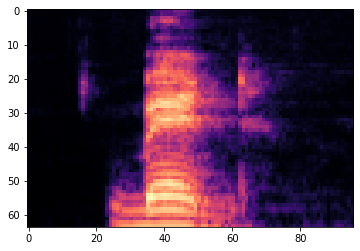

In [21]:
plt.imshow(np.flip(vggish_data.T, axis=0), cmap='magma')

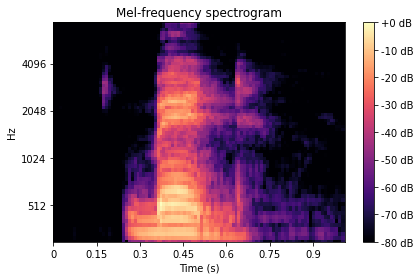

In [22]:
melspec_fig(signal)

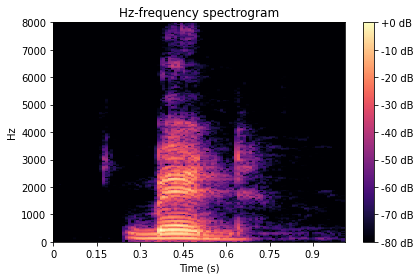

In [23]:
spec_fig(signal)

In [24]:
def disp_wav(fn):
    print(fn)

    signal, _ = librosa.load(fn, sr=16000)
    print(signal.sum())
    
    fig = plt.figure()
    librosa.display.waveplot(signal, sr=16000)
    plt.close()
    
    sfig = melspec_fig(signal, sr=16000)
    
    ipd.display(fig)
    ipd.display(sfig)
    ipd.display(ipd.Audio(fn))


/home/ubuntu/audio/speech_commands/learn/c50f55b8_nohash_18.wav
0.02508545


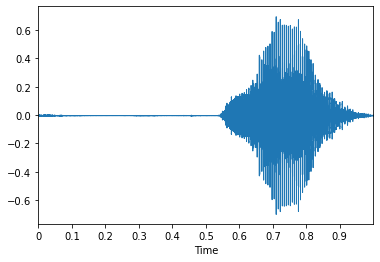

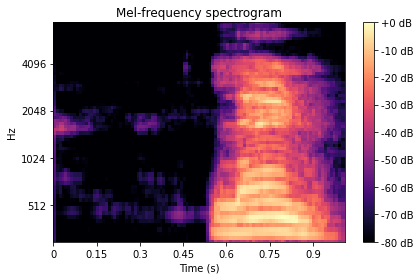

/home/ubuntu/audio/speech_commands/learn/c50f55b8_nohash_7.wav
1.2986145


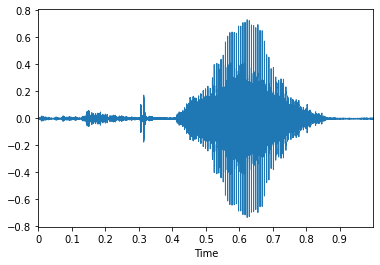

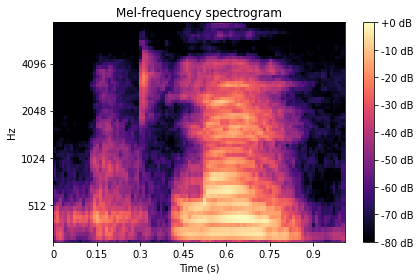

/home/ubuntu/audio/speech_commands/learn/c50f55b8_nohash_12.wav
-2.9322205


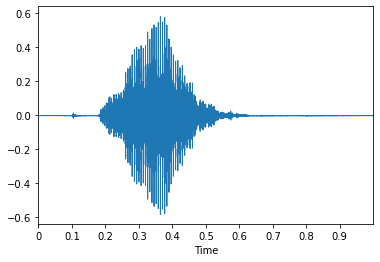

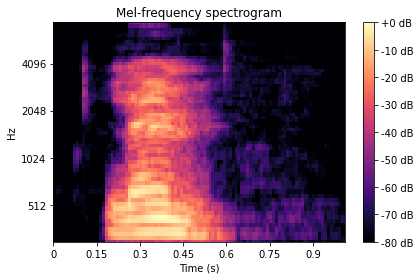

In [25]:
%matplotlib inline

# Compare same speaker, same word
learn_fns = df[(df.speaker == speaker) & (df.label=='learn')].file_name.sample(3, random_state=1)

for fn in learn_fns:
    disp_wav(fn)

/home/ubuntu/audio/speech_commands/bird/c50f55b8_nohash_1.wav
-0.18182373


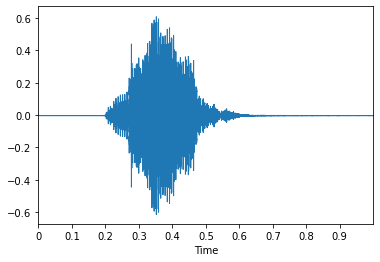

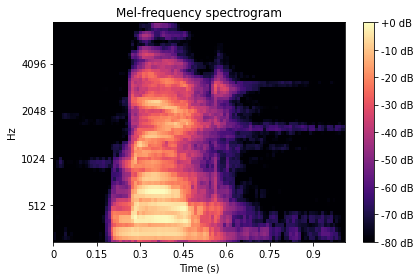

/home/ubuntu/audio/speech_commands/yes/c50f55b8_nohash_5.wav
2.0501404


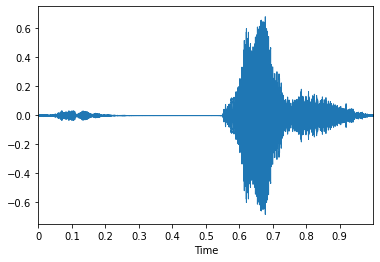

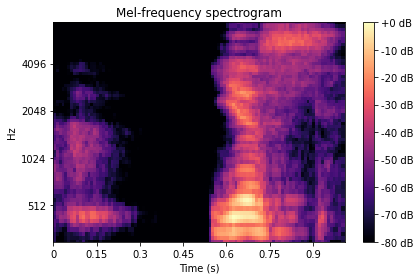

/home/ubuntu/audio/speech_commands/on/c50f55b8_nohash_7.wav
-0.73831177


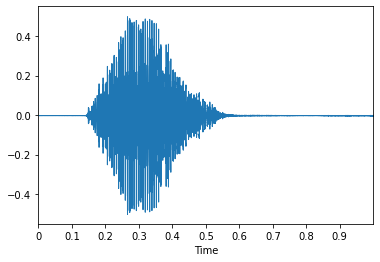

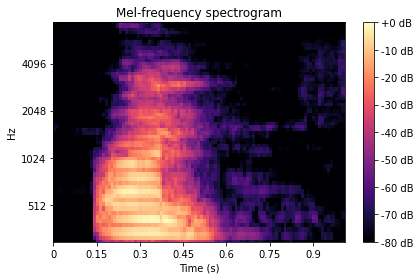

In [26]:
%matplotlib inline

# Compare same speaker, different words
learn_fns = df[(df.speaker == speaker) & (df.label!='learn')].file_name.sample(3, random_state=0)

for fn in learn_fns:
    disp_wav(fn)

/home/ubuntu/audio/speech_commands/learn/5170b77f_nohash_4.wav
0.65234375


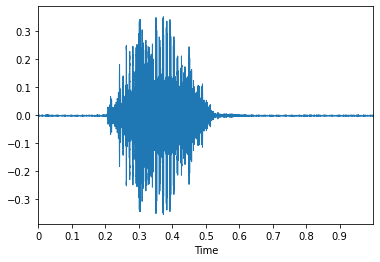

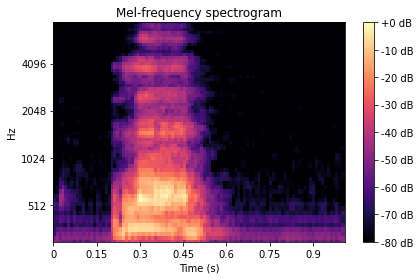

/home/ubuntu/audio/speech_commands/learn/893705bb_nohash_3.wav
-0.7152405


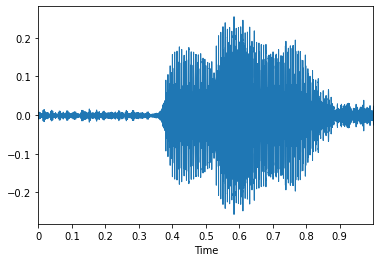

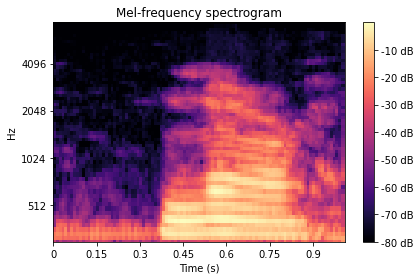

/home/ubuntu/audio/speech_commands/learn/171edea9_nohash_2.wav
-5.73114


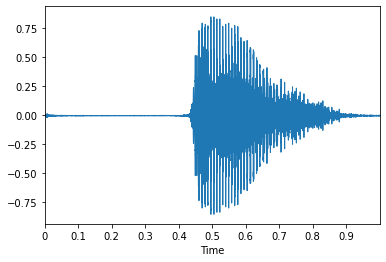

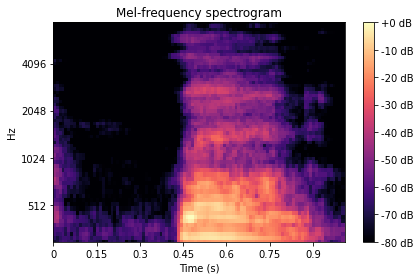

In [27]:
%matplotlib inline

# Compare different speaker, same word
learn_fns = df[(df.speaker != speaker) & (df.label=='learn')].file_name.sample(3, random_state=0)

for fn in learn_fns:
    disp_wav(fn)

/home/ubuntu/audio/speech_commands/bird/c50f55b8_nohash_1.wav
-0.18182373


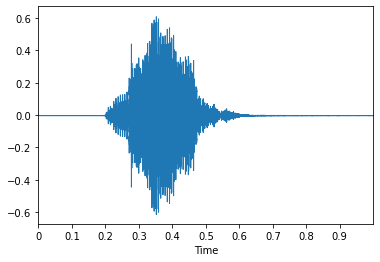

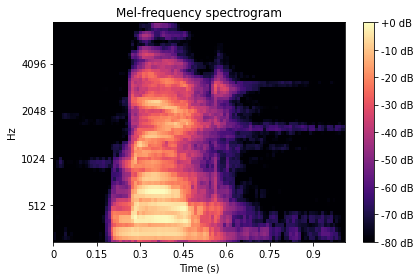

/home/ubuntu/audio/speech_commands/on/c50f55b8_nohash_7.wav
-0.73831177


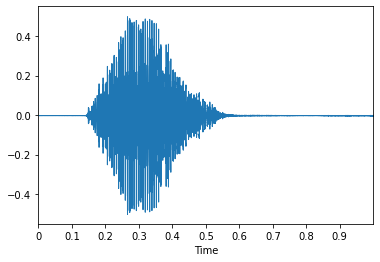

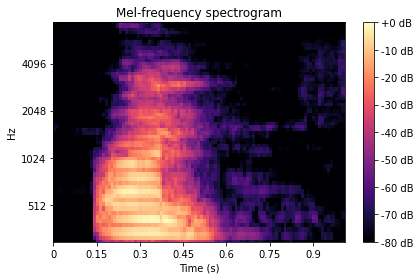

In [28]:
# Compare differences --- same speaker, "on" vs "bird"
bird_fn = '/home/ubuntu/audio/speech_commands/bird/c50f55b8_nohash_1.wav'
on_fn = '/home/ubuntu/audio/speech_commands/on/c50f55b8_nohash_7.wav'

disp_wav(bird_fn)
disp_wav(on_fn)

In [29]:
sig_bird, _ = librosa.load(bird_fn, sr=16000)
sig_on, _ = librosa.load(on_fn, sr=16000)

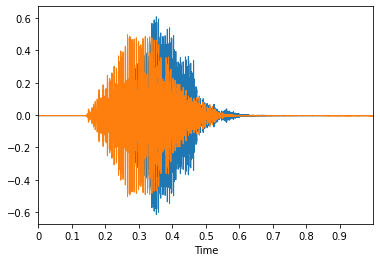

In [30]:
librosa.display.waveplot(sig_bird, sr=16000)
librosa.display.waveplot(sig_on, sr=16000)

In [31]:
align_bird = sig_bird[1000:]
align_on = sig_on[:-1000]

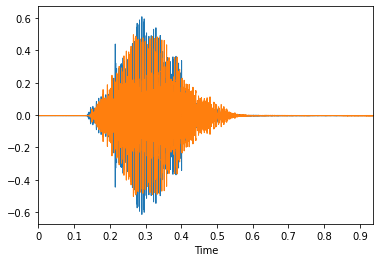

In [32]:
librosa.display.waveplot(align_bird, sr=16000)
librosa.display.waveplot(align_on, sr=16000)

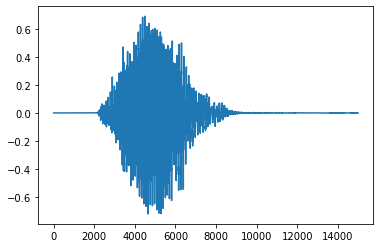

In [33]:
plt.plot((align_bird-align_on))

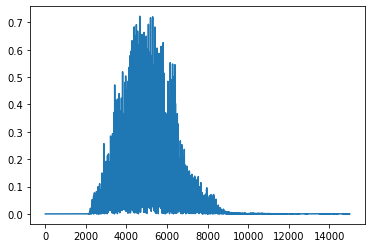

In [34]:
plt.plot(np.abs(align_bird-align_on))

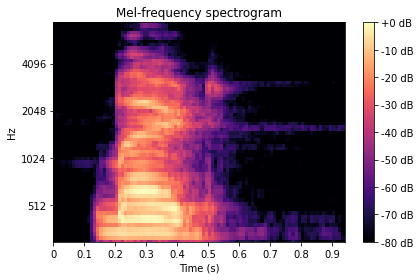

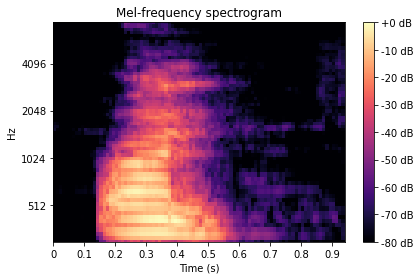

In [35]:
fig_bird = melspec_fig(align_bird)
fig_on = melspec_fig(align_on)

ipd.display(fig_bird)
ipd.display(fig_on)

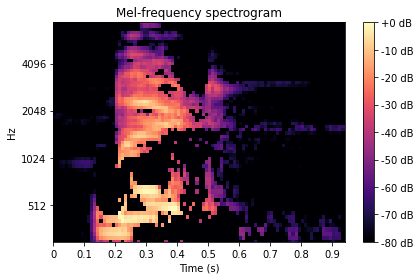

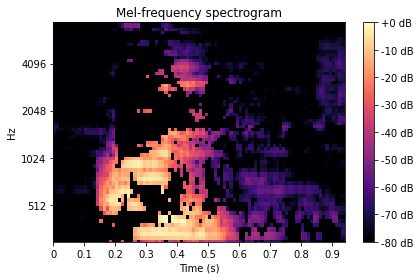

In [36]:
melspec_bird = librosa.feature.melspectrogram(align_bird, sr=sr, n_fft=fft_length,
                           window='hann',
                           hop_length=hop_length_samples, win_length=window_length_samples,
                          n_mels=64)

melspec_on = librosa.feature.melspectrogram(align_on, sr=sr, n_fft=fft_length,
                           window='hann',
                           hop_length=hop_length_samples, win_length=window_length_samples,
                          n_mels=64)

S_dB = librosa.power_to_db(melspec_bird-melspec_on, ref=np.max)

plt.figure()
librosa.display.specshow(S_dB, x_axis='s',
                          y_axis='mel', sr=sr,
                          fmin=125, fmax=7500, hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()


plt.figure()
S_dB = librosa.power_to_db(melspec_on-melspec_bird, ref=np.max)
librosa.display.specshow(S_dB, x_axis='s',
                          y_axis='mel', sr=sr,
                          fmin=125, fmax=7500, hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()


## Why mel scale?

In [37]:
hz100 = librosa.core.tone(100, sr=sr, duration=3)

hz200 = librosa.core.tone(200, sr=sr, duration=3)

hz300 = librosa.core.tone(300, sr=sr, duration=3)

hz400 = librosa.core.tone(400, sr=sr, duration=3)

hz1000 = librosa.core.tone(1000, sr=sr, duration=3)

hz1100 = librosa.core.tone(1100, sr=sr, duration=3)

hz1200 = librosa.core.tone(1200, sr=sr, duration=3)

hz1300 = librosa.core.tone(1300, sr=sr, duration=3)


hz6000 = librosa.core.tone(6000, sr=sr, duration=3)

hz6100 = librosa.core.tone(6100, sr=sr, duration=3)

hz6200 = librosa.core.tone(6200, sr=sr, duration=3)

hz6300 = librosa.core.tone(6300, sr=sr, duration=3)

hz6400 = librosa.core.tone(6400, sr=sr, duration=3)

In [38]:
ipd.display(ipd.Audio(data=hz100, rate=sr))
ipd.display(ipd.Audio(data=hz200, rate=sr))
ipd.display(ipd.Audio(data=hz300, rate=sr))
ipd.display(ipd.Audio(data=hz400, rate=sr))


In [39]:
ipd.display(ipd.Audio(data=hz1000, rate=sr))
ipd.display(ipd.Audio(data=hz1100, rate=sr))
ipd.display(ipd.Audio(data=hz1200, rate=sr))
ipd.display(ipd.Audio(data=hz1300, rate=sr))

In [40]:
ipd.display(ipd.Audio(data=hz6000, rate=sr))
ipd.display(ipd.Audio(data=hz6100, rate=sr))
ipd.display(ipd.Audio(data=hz6200, rate=sr))
ipd.display(ipd.Audio(data=hz6300, rate=sr))
ipd.display(ipd.Audio(data=hz6400, rate=sr))

In [41]:
librosa.hz_to_mel([100, 200, 300, 400])

array([1.5, 3. , 4.5, 6. ])

In [42]:
librosa.hz_to_mel(200) - librosa.hz_to_mel(100)

1.5

In [43]:
librosa.hz_to_mel(6000)

41.06128214340672

In [44]:
librosa.mel_to_hz([41.06128214340672, 41.06128214340672 + 1.5, 41.06128214340672 + 3, 41.06128214340672 + 4.5])

array([6000.        , 6651.79760952, 7374.40190633, 8175.5048287 ])

In [45]:
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(1.5), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(3), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(4.5), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(6), sr=sr, duration=3), rate=sr))

In [46]:
librosa.hz_to_mel(6000, htk=True)

2545.6346991716478

In [47]:
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(41.06128214340672), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(41.06128214340672+1.5), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(41.06128214340672+3), sr=sr, duration=3), rate=sr))
ipd.display(ipd.Audio(data=librosa.core.tone(librosa.mel_to_hz(41.06128214340672+4.5), sr=sr, duration=3), rate=sr))

In [48]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

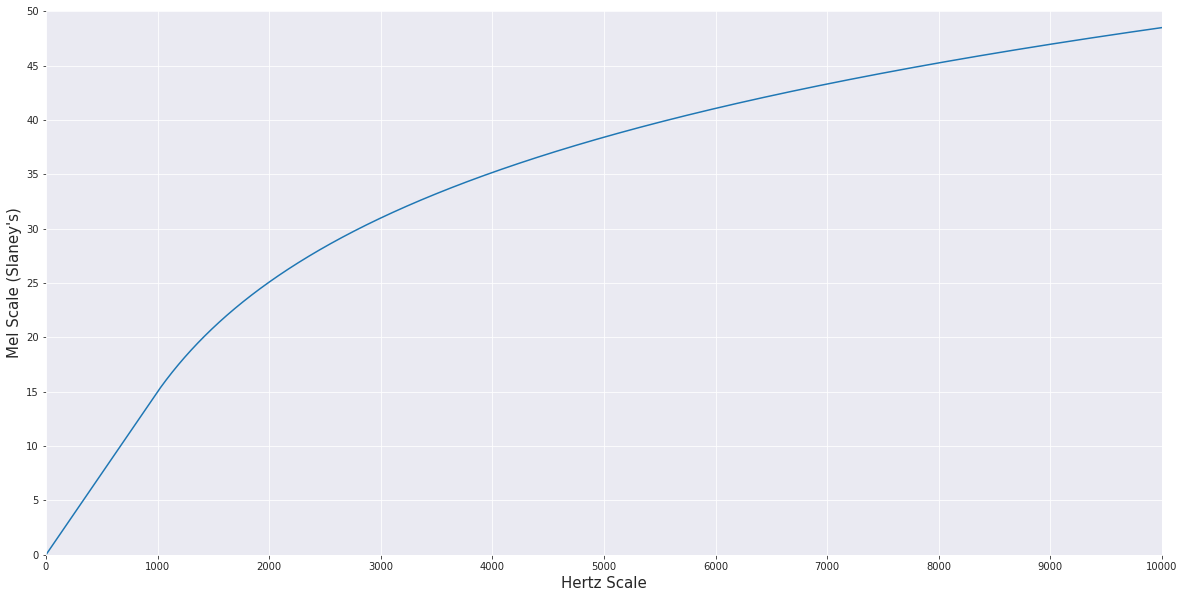

In [49]:
# Plotting hz vs mel
hz_val = np.linspace(1,10000,10000)
mel_val = librosa.hz_to_mel(hz_val)

sns.set_style('darkgrid',
             {
                'xtick.bottom': True,
                'ytick.left': True,                 
             })
plt.figure(figsize=(20,10))
ax = sns.lineplot(hz_val, mel_val, )
sns.despine()

ax.set_xlabel('Hertz Scale', fontsize=15)
ax.set_ylabel("Mel Scale (Slaney's)", fontsize=15)


ax.set_xticks(np.arange(0,10001,1000))
ax.set_yticks(np.arange(0,51,5));

ax.set_xlim([0, 10000])
ax.set_ylim([0,50]);

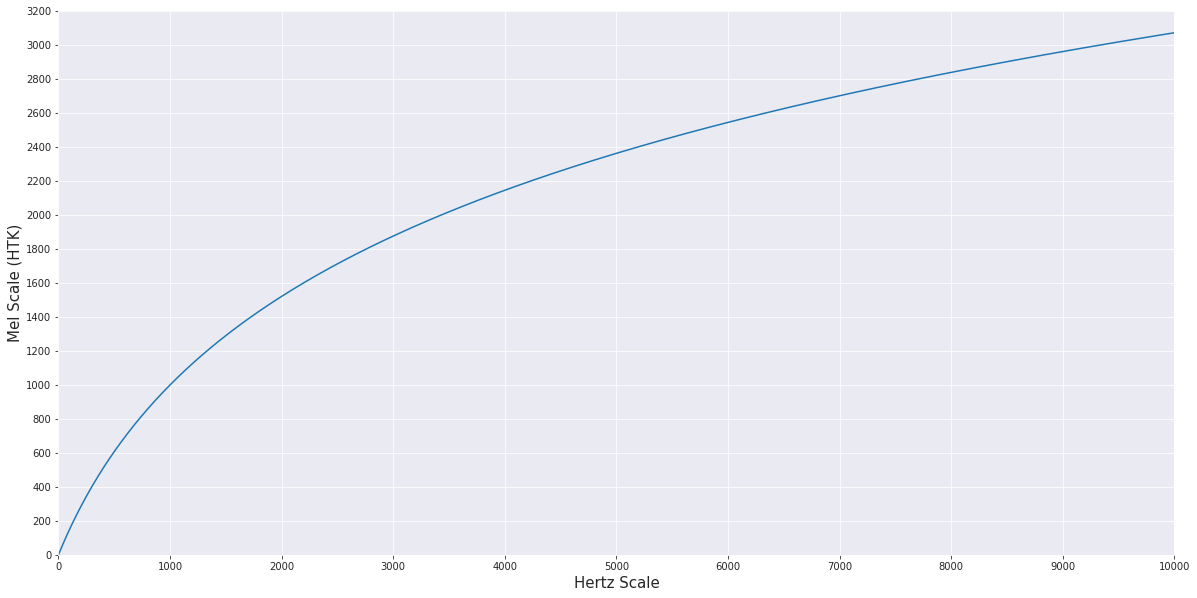

In [50]:
# Plotting hz vs mel
hz_val = np.linspace(1,10000,10000)
mel_val = librosa.hz_to_mel(hz_val, htk=True)

sns.set_style('darkgrid',
             {
                'xtick.bottom': True,
                'ytick.left': True,
                 
             })
plt.figure(figsize=(20,10))
ax = sns.lineplot(hz_val, mel_val, )
sns.despine()

ax.set_xlabel('Hertz Scale', fontsize=15)
ax.set_ylabel("Mel Scale (HTK)", fontsize=15)


ax.set_xticks(np.arange(0,10001,1000))
ax.set_yticks(np.arange(0,3201,200));

ax.set_xlim([0, 10000])
ax.set_ylim([0,3200]);

## C major scale - hz and mel
C scales at 'middle c' and at 3 octaves higher sound like each note is the same distance apart, but the difference is significantly different

In [51]:
c = 261.626
d = 293.665
e = 329.628
f = 349.228
g = 391.995
a = 440
b = 493.883
c2 = 523.251

In [52]:
ac = librosa.core.tone(c, sr=sr, duration=.05)
ad = librosa.core.tone(d, sr=sr, duration=.05)
ae = librosa.core.tone(e, sr=sr, duration=.05)
af = librosa.core.tone(f, sr=sr, duration=.05)
ag = librosa.core.tone(g, sr=sr, duration=.05)
aa = librosa.core.tone(a, sr=sr, duration=.05)
ab = librosa.core.tone(b, sr=sr, duration=.05)
ac2 = librosa.core.tone(c2, sr=sr, duration=.05)

ac_major = np.concatenate([ac, ad, ae, af, ag, aa, ab, ac2, ac2, ab, aa, ag, af, ae, ad, ac])

ipd.display(ipd.Audio(data=ac_major, rate=sr))



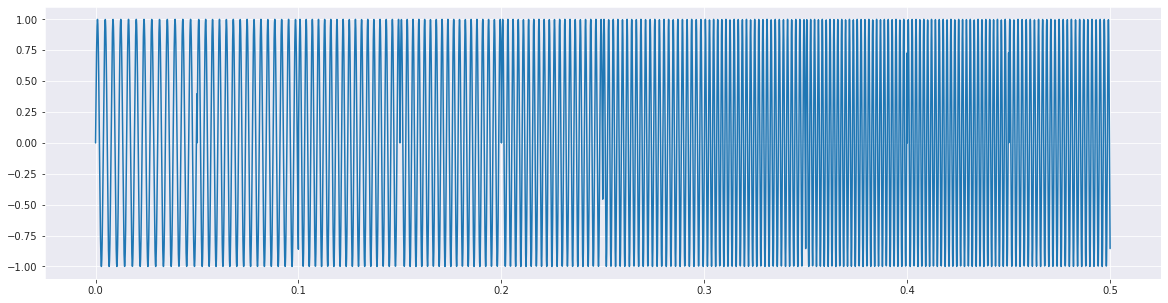

In [53]:
plt.figure(figsize=(20,5))
sns.lineplot(np.arange(len(ac_major))[:8000]/sr, ac_major[:8000])

In [54]:
# Chords, fft
chord = librosa.tone(500, sr=sr, duration=3) + librosa.tone(1000, sr=sr, duration=3) + librosa.tone(1500, sr=sr, duration=3)
ipd.display(ipd.Audio(data=chord, rate=sr))


Text(0.5, 1.0, 'Sin wave - 500 Hz')

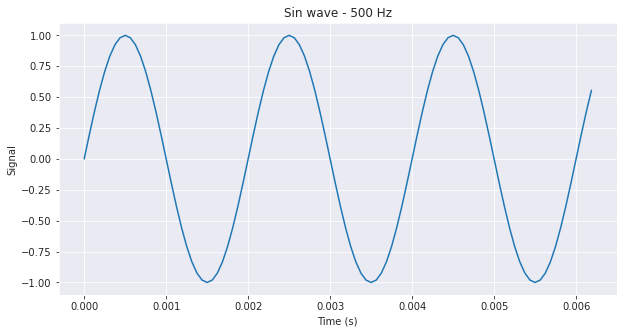

In [55]:
f = 500
s = librosa.tone(f, sr=sr, duration=3)
plt.figure(figsize=(10,5))
ax = sns.lineplot(y=s[:100], x=(np.arange(len(s))/sr)[:100])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal')
ax.set_title('Sin wave - {} Hz'.format(f))

Text(0.5, 1.0, 'Sin wave - 1000 Hz')

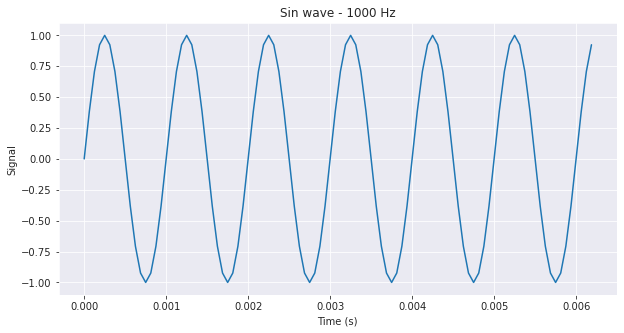

In [56]:
f = 1000
s = librosa.tone(f, sr=sr, duration=3)
plt.figure(figsize=(10,5))
ax = sns.lineplot(y=s[:100], x=(np.arange(len(s))/sr)[:100])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal')
ax.set_title('Sin wave - {} Hz'.format(f))

Text(0.5, 1.0, 'Sin wave - 1500 Hz')

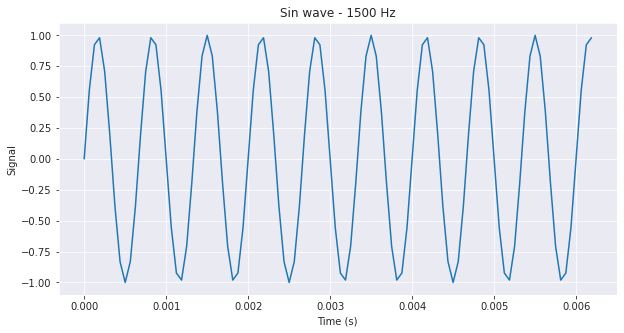

In [57]:
f = 1500
s = librosa.tone(f, sr=sr, duration=3)
plt.figure(figsize=(10,5))
ax = sns.lineplot(y=s[:100], x=(np.arange(len(s))/sr)[:100])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal')
ax.set_title('Sin wave - {} Hz'.format(f))

Text(0.5, 1.0, 'Combined signal')

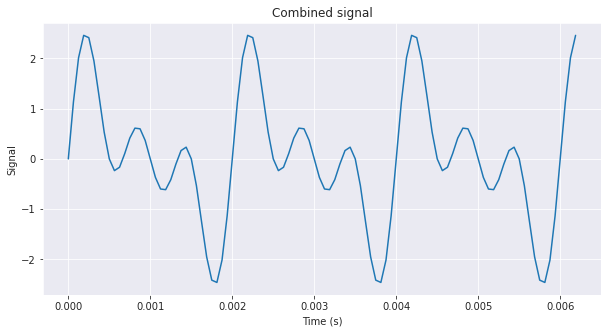

In [58]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(y=chord[:100], x=(np.arange(len(chord))/sr)[:100])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal')
ax.set_title('Combined signal')

(0.0, 2000.0)

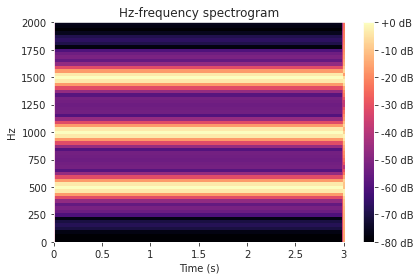

In [59]:
fig = plt.figure()
spec = librosa.spectrum.stft(chord, n_fft=fft_length,
                           window='hann',
                           hop_length=hop_length_samples, win_length=window_length_samples)

S_dB = librosa.power_to_db(np.abs(spec)**2, ref=np.max)
librosa.display.specshow(S_dB, x_axis='s',
                          y_axis='hz', sr=sr,
                          fmin=125, fmax=500, hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Hz-frequency spectrogram')
plt.tight_layout()

fig.get_axes()[0].set_ylim([0,2000])
# fig = spec_fig(chord)
# ax = fig.get_axes()[0]

# ax.set_ylim([0,512])

# fig

Text(0.5, 1.0, 'Frequency Decomposition')

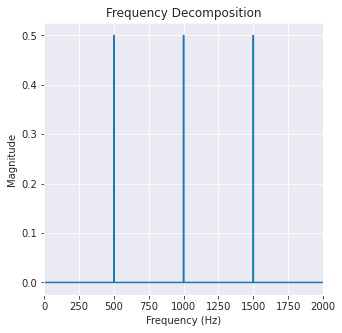

In [60]:
fourierTransform = np.fft.fft(chord)/len(chord)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(chord)/2))] # Exclude sampling frequency

 

tpCount     = len(chord)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sr

frequencies = values/3

plt.figure(figsize=(5,5)) 
ax = sns.lineplot(frequencies, abs(fourierTransform))
ax.set_xlim([0,2000])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Frequency Decomposition')

In [61]:
c = 261.626
d = 293.665
e = 329.628
f = 349.228
g = 391.995
a = 440
b = 493.883
c2 = 523.251

c_major = np.array([c, d, e, f, g, a, b, c2])
c_major

array([261.626, 293.665, 329.628, 349.228, 391.995, 440.   , 493.883,
       523.251])

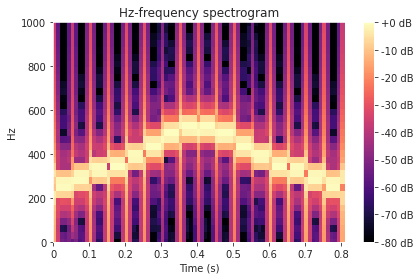

In [62]:
audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.05), 
                    np.concatenate([c_major, np.flip(c_major)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

# ipd.display(melspec_fig(audio_data))
fig = spec_fig(audio_data)
fig.get_axes()[0].set_ylim([0,1000])

ipd.display(fig)

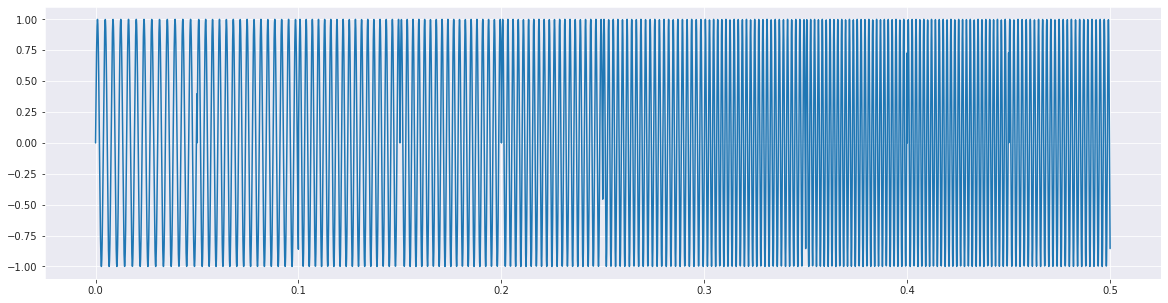

In [63]:
plt.figure(figsize=(20,5))
sns.lineplot(np.arange(len(audio_data))[:8000]/sr, audio_data[:8000])

Text(0.5, 1.0, 'Frequency Decomposition')

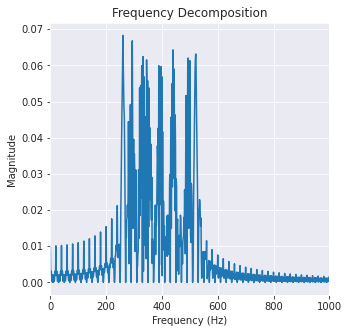

In [64]:
fourierTransform = np.fft.fft(audio_data)/len(audio_data)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(audio_data)/2))] # Exclude sampling frequency

 

tpCount     = len(audio_data)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sr

frequencies = values/0.8

plt.figure(figsize=(5,5)) 
ax = sns.lineplot(frequencies, abs(fourierTransform))
ax.set_xlim([0,1000])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Frequency Decomposition')

In [65]:
# Progression of increases along scale
cm_diff = np.diff(c_major)
cm_diff

array([32.039, 35.963, 19.6  , 42.767, 48.005, 53.883, 29.368])

In [66]:
cm_diff.mean()

37.375

In [67]:
# To get this progression, insert starting note and take cumulative sum

np.cumsum(np.insert(cm_diff, 0, c))

array([261.626, 293.665, 329.628, 349.228, 391.995, 440.   , 493.883,
       523.251])

In [68]:
# 3 octaves higher - starting at c6

np.concatenate([c_major*4, np.flip(c_major*4)])

array([1046.504, 1174.66 , 1318.512, 1396.912, 1567.98 , 1760.   ,
       1975.532, 2093.004, 2093.004, 1975.532, 1760.   , 1567.98 ,
       1396.912, 1318.512, 1174.66 , 1046.504])

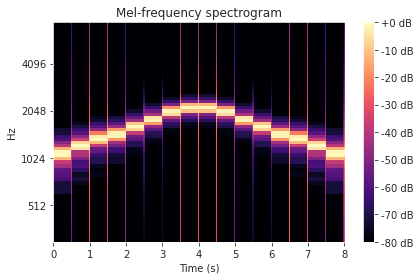

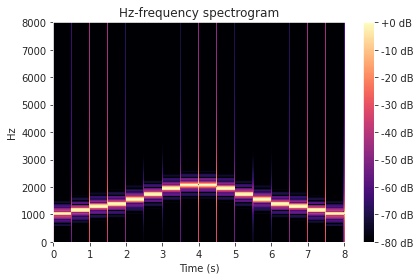

In [69]:
audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([c_major*4, np.flip(c_major*4)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

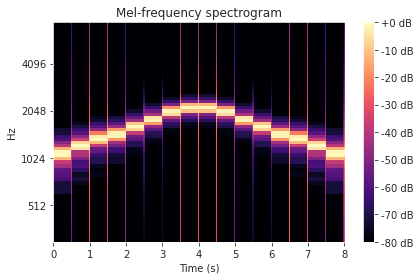

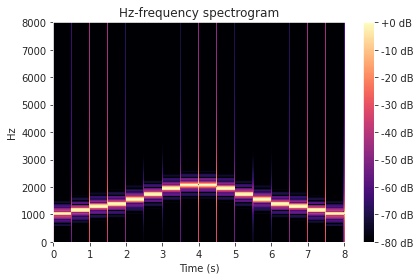

In [70]:
# Starting at c6 but using differences in c4 scale
c2_cmajor = np.cumsum(np.insert(cm_diff*4, 0, c*4))
audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([c2_cmajor, np.flip(c2_cmajor)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

In [71]:
# c_major freqs in mel
c_mel = librosa.hz_to_mel(c)
c_major_mel = librosa.hz_to_mel(c_major)
c_major_mel

array([3.92439 , 4.404975, 4.94442 , 5.23842 , 5.879925, 6.6     ,
       7.408245, 7.848765])

In [72]:
# Progression of increases along scale
cm_diff_mel = np.diff(c_major_mel)
cm_diff

array([32.039, 35.963, 19.6  , 42.767, 48.005, 53.883, 29.368])

In [73]:
np.cumsum(np.insert(cm_diff_mel, 0, c_mel))

array([3.92439 , 4.404975, 4.94442 , 5.23842 , 5.879925, 6.6     ,
       7.408245, 7.848765])

In [74]:
c6_mel = librosa.hz_to_mel(c*4)
c6_mel

15.661147782158336

In [75]:
c6_major_mel = np.cumsum(np.insert(cm_diff_mel, 0, c6_mel))
c6_major_mel

array([15.66114778, 16.14173278, 16.68117778, 16.97517778, 17.61668278,
       18.33675778, 19.14500278, 19.58552278])

In [76]:
librosa.hz_to_mel(c_major*4)

array([15.66114778, 17.34144847, 19.02176989, 19.86189737, 21.5422042 ,
       23.22253373, 24.90283822, 25.74300014])

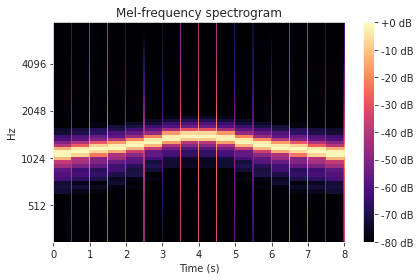

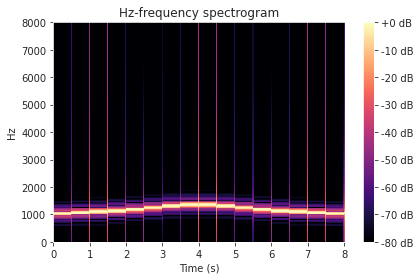

In [77]:
c6_major_mel_hz = librosa.mel_to_hz(c6_major_mel)
audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([c6_major_mel_hz, np.flip(c6_major_mel_hz)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

In [78]:
# Starting with Mel freqs --


hz freq: [261.626 299.001 336.376 373.751 411.126 448.501 485.876 523.251]
hz diff: [37.375 37.375 37.375 37.375 37.375 37.375 37.375]
mel diff: [0.560625 0.560625 0.560625 0.560625 0.560625 0.560625 0.560625]


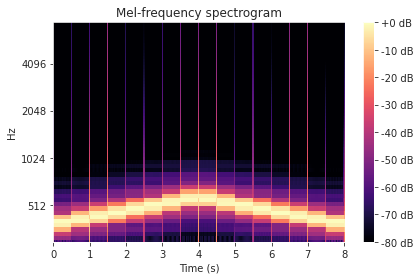

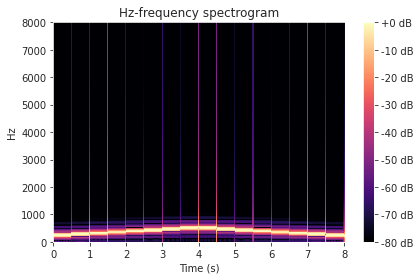

In [79]:
melf = librosa.mel_frequencies(n_mels=8, fmin=c, fmax=c2)

print('hz freq:', melf)
print('hz diff:', np.diff(melf))
print('mel diff:', np.diff(librosa.hz_to_mel(melf)))

audio_melf = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([melf, np.flip(melf)]))
audio_data = np.concatenate(list(audio_melf))
ipd.display(ipd.Audio(data=audio_data, rate=sr))
ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

In [80]:
np.diff(librosa.hz_to_mel(melf))

array([0.560625, 0.560625, 0.560625, 0.560625, 0.560625, 0.560625,
       0.560625])

hz freq: [1046.504      1155.43377696 1275.7019686  1408.48878156 1555.09726928
 1716.96611899 1895.68376975 2093.004     ]
hz diff: [108.92977696 120.26819164 132.78681296 146.60848772 161.86884971
 178.71765076 197.32023025]
mel diff: [1.44026462 1.44026462 1.44026462 1.44026462 1.44026462 1.44026462
 1.44026462]


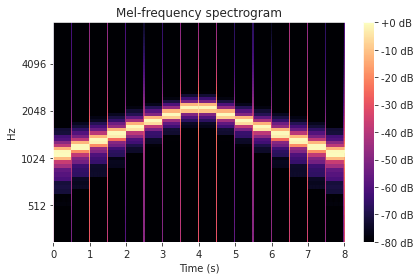

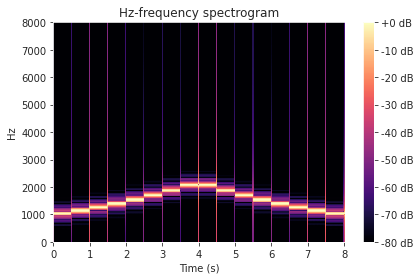

In [81]:
melf = librosa.mel_frequencies(n_mels=8, fmin=c*4, fmax=c2*4)

print('hz freq:', melf)
print('hz diff:', np.diff(melf))
print('mel diff:', np.diff(librosa.hz_to_mel(melf)))


audio_melf = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([melf, np.flip(melf)]))
audio_data = np.concatenate(list(audio_melf))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

In [82]:
# hz - decompose c to c2 into 8 equidistant points

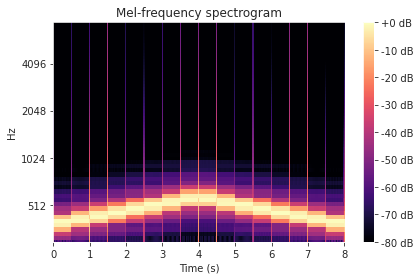

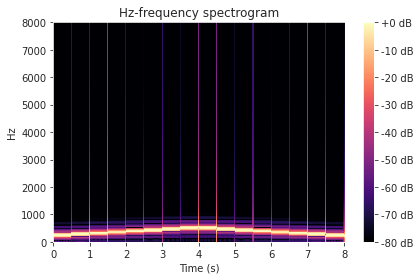

In [83]:
scale = np.linspace(c,c2,num=8)

audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([scale, np.flip(scale)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))

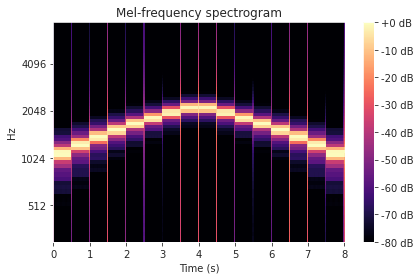

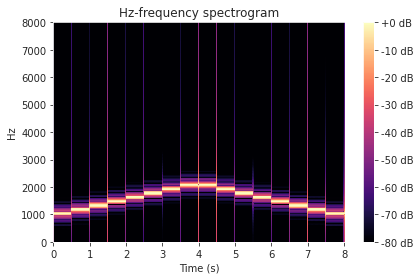

In [84]:
scale = np.linspace(c*4,c2*4,num=8)

audio_c_major = map(lambda s: librosa.core.tone(s, sr=sr, duration=.5), 
                    np.concatenate([scale, np.flip(scale)]))

audio_data = np.concatenate(list(audio_c_major))
ipd.display(ipd.Audio(data=audio_data, rate=sr))

ipd.display(melspec_fig(audio_data))
ipd.display(spec_fig(audio_data))